In [1]:
import pandas as pd
import numpy as np

In [2]:
# Till Now
# Timestamp
print(pd.Timestamp('6th Jan 2023 8:10'))
print(pd.Timestamp('6th Jan 2023 8:10').year)
print(pd.Timestamp('6th Feb 2023 8:10').month)
print(pd.Timestamp('6th Feb 2023 8:10').hour)

2023-01-06 08:10:00
2023
2
8


In [3]:
# DateTime Index
pd.DatetimeIndex([pd.Timestamp('6th Jan 2023 8:10'),pd.Timestamp('7th Jan 2023 8:10'),pd.Timestamp('8th Jan 2023 8:10')])[0]

Timestamp('2023-01-06 08:10:00')

In [4]:
# date_range()
pd.date_range(start='2023-01-06',end='2023-01-31',freq='D')

DatetimeIndex(['2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09',
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21',
               '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29',
               '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='D')

In [14]:
# to_datetime()
s = pd.Series(['2023/1/6','2023/1/7','2023/1/8'])
print(pd.to_datetime(s))
print(pd.to_datetime(s).dt.year)
print(pd.to_datetime(s).dt.day)

0   2023-01-06
1   2023-01-07
2   2023-01-08
dtype: datetime64[ns]
0    2023
1    2023
2    2023
dtype: int32
0    6
1    7
2    8
dtype: int32


# Timedelta Objects
Represent the duration, the difference between two dates and times

In [17]:
t1 = pd.Timestamp('6th Jan 2023 8:10:14')
t2 = pd.Timestamp('26th Jan 2023 10:00:00')
t2-t1

Timedelta('20 days 01:49:46')

In [21]:
# Standalone Timedelta creation 
pd.Timedelta(days=2,hours=10,minutes=20,seconds=25)   # It a gap or interval of 2days 10hr 20min and 25 sec

Timedelta('2 days 10:20:25')

In [22]:
pd.Timestamp('6th Jan 2023')+pd.Timedelta(days=2,hours=10,minutes=20,seconds=25)

Timestamp('2023-01-08 10:20:25')

In [26]:
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D')+pd.Timedelta(days=2,hours=10,minutes=20,seconds=25)

DatetimeIndex(['2023-01-08 10:20:25', '2023-01-09 10:20:25',
               '2023-01-10 10:20:25', '2023-01-11 10:20:25',
               '2023-01-12 10:20:25', '2023-01-13 10:20:25',
               '2023-01-14 10:20:25', '2023-01-15 10:20:25',
               '2023-01-16 10:20:25', '2023-01-17 10:20:25',
               '2023-01-18 10:20:25', '2023-01-19 10:20:25',
               '2023-01-20 10:20:25', '2023-01-21 10:20:25',
               '2023-01-22 10:20:25', '2023-01-23 10:20:25',
               '2023-01-24 10:20:25', '2023-01-25 10:20:25',
               '2023-01-26 10:20:25', '2023-01-27 10:20:25',
               '2023-01-28 10:20:25', '2023-01-29 10:20:25',
               '2023-01-30 10:20:25', '2023-01-31 10:20:25',
               '2023-02-01 10:20:25', '2023-02-02 10:20:25'],
              dtype='datetime64[ns]', freq='D')

In [29]:
delivery = pd.read_csv(r"C:\Users\sasha\Desktop\Python\Python_Tutorial\Python_tut\Data Manupulations\Time Series Analysis\deliveries.csv")
delivery.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [30]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_date     501 non-null    object
 1   delivery_date  501 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [33]:
delivery['order_date']= pd.to_datetime(delivery['order_date'])
delivery['delivery_date']= pd.to_datetime(delivery['delivery_date'])

C:\Users\sasha\AppData\Local\Temp\ipykernel_17104\230487472.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  delivery['delivery_date']= pd.to_datetime(delivery['delivery_date'])


In [34]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     501 non-null    datetime64[ns]
 1   delivery_date  501 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.0 KB


In [36]:
delivery['delivery_time_period']= delivery['delivery_date']-delivery['order_date']
delivery

,order_date,delivery_date,delivery_time_period
0,1998-05-24,1999-02-05,257 days
1,1992-04-22,1998-03-06,2144 days
2,1991-02-10,1992-08-26,563 days
3,1992-07-21,1997-11-20,1948 days
4,1993-09-02,1998-06-10,1742 days
...,...,...,...
496,1991-06-24,1996-02-02,1684 days
497,1991-09-09,1998-03-30,2394 days
498,1990-11-16,1998-04-27,2719 days
499,1993-06-03,1993-06-13,10 days


In [37]:
delivery['delivery_time_period'].mean()

Timedelta('1217 days 22:53:53.532934128')

# Time Series 
A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

Examples

- Financial Data (Company stocks)
- Natural Data (Rainfall measurement)
- Event Data (Covid)
- Medical Data (Heart rate monitoring)

Types of Operations done on Time Series

- Time Series Analysis
- Time Series Forecasting

In [39]:
google_data = pd.read_csv(r"C:\Users\sasha\Desktop\Python\Python_Tutorial\Python_tut\Data Manupulations\Time Series Analysis\google.csv")
google_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [41]:
google_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600
4470,2022-05-20,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100


In [42]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4471 non-null   object 
 1   Open       4471 non-null   float64
 2   High       4471 non-null   float64
 3   Low        4471 non-null   float64
 4   Close      4471 non-null   float64
 5   Adj Close  4471 non-null   float64
 6   Volume     4471 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 244.6+ KB


In [43]:
google_data['Date'] = pd.to_datetime(google_data['Date'])   # Change the object datatype to datetime datatype.

In [44]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4471 non-null   datetime64[ns]
 1   Open       4471 non-null   float64       
 2   High       4471 non-null   float64       
 3   Low        4471 non-null   float64       
 4   Close      4471 non-null   float64       
 5   Adj Close  4471 non-null   float64       
 6   Volume     4471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 244.6 KB


In [46]:
google_data.set_index('Date',inplace=True)

In [47]:
google_data.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874


In [50]:
# fetch a specific date 
google_data.loc['2021-12-30']

Open           2929.000000
High           2941.250000
Low            2915.169922
Close          2920.050049
Adj Close      2920.050049
Volume       648900.000000
Name: 2021-12-30 00:00:00, dtype: float64

In [54]:
# Partial Indexing - Select a particular year/month
google_data.loc['2008-10']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-10-01,204.807327,207.711441,200.797363,205.091263,205.091263,12516339
2008-10-02,204.129868,204.224518,192.279297,194.515900,194.515900,12014666
2008-10-03,197.933105,205.479813,190.819763,192.732590,192.732590,16045719
2008-10-06,186.291733,187.292984,177.913132,184.911911,184.911911,22525315
2008-10-07,185.967941,186.789871,172.040146,172.358963,172.358963,22191669
2008-10-08,164.463547,178.824722,162.446106,168.423706,168.423706,23741457
2008-10-09,171.616745,173.634171,160.234406,163.875748,163.875748,16210534
2008-10-10,155.995285,170.306656,154.570633,165.380112,165.380112,21275046
2008-10-13,177.230698,190.261856,172.229446,189.798584,189.798584,17877760


In [55]:
google_data.loc['2008']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,345.141327,347.382935,337.599579,341.315674,341.315674,8646087
2008-01-03,341.350525,342.142578,336.996857,341.385406,341.385406,6529382
2008-01-04,338.575928,339.208557,326.277039,327.273285,327.273285,10759780
2008-01-07,325.749023,329.903442,317.484985,323.412781,323.412781,12854803
2008-01-08,325.280762,328.747772,314.321838,314.660583,314.660583,10718225
...,...,...,...,...,...,...
2008-12-24,150.177094,152.598022,148.632889,150.909348,150.909348,3857405
2008-12-26,151.467270,152.060043,148.598022,149.619186,149.619186,3932886
2008-12-29,149.549454,150.127289,145.245590,148.154678,148.154678,7431551


In [59]:
google_data['Month_Name']= google_data.index.month_name()
google_data['Weekday_Name']= google_data.index.day_name()
google_data['Quarter'] = google_data.index.quarter

In [60]:
google_data

,Open,High,Low,Close,Adj Close,Volume,Month_Name,Weekday_Name,Quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3
...,...,...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100,May,Monday,2
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800,May,Tuesday,2
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100,May,Wednesday,2


In [63]:
# Slicing 
google_data.loc['2008-12-15':'2009-01-15']

,Open,High,Low,Close,Adj Close,Volume,Month_Name,Weekday_Name,Quarter
Date,,,,,,,,,
2008-12-15,156.418701,158.650345,151.985321,154.754944,154.754944,13526311,December,Monday,4
2008-12-16,156.672745,164.134781,155.053818,162.032669,162.032669,14172122,December,Tuesday,4
2008-12-17,158.725067,160.463547,155.626678,157.031403,157.031403,11622802,December,Wednesday,4
2008-12-18,157.758682,159.576874,153.977859,154.560669,154.560669,9562710,December,Thursday,4
2008-12-19,154.914337,158.301651,153.923065,154.505875,154.505875,11267275,December,Friday,4
2008-12-22,153.703873,154.172119,144.772354,148.000259,148.000259,7864568,December,Monday,4
2008-12-23,149.654053,151.088684,147.781082,148.453568,148.453568,7583719,December,Tuesday,4
2008-12-24,150.177094,152.598022,148.632889,150.909348,150.909348,3857405,December,Wednesday,4
2008-12-26,151.467270,152.060043,148.598022,149.619186,149.619186,3932886,December,Friday,4


In [84]:
# Challenge - fetch particular day for every year.--> limitation of timedelta.
data_range_data = pd.date_range(start='2005-1-6',end='2021-1-6',freq=pd.DateOffset(years=1))
google_data[google_data.index.isin(data_range_data)]

,Open,High,Low,Close,Adj Close,Volume,Month_Name,Weekday_Name,Quarter
Date,,,,,,,,,
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20852067,January,Thursday,1
2006-01-06,227.581970,234.371521,225.773743,231.960556,231.960556,35646914,January,Friday,1
2009-01-06,165.868286,169.763687,162.585587,166.406265,166.406265,12898566,January,Tuesday,1
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226,January,Wednesday,1
2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026,January,Thursday,1
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987,January,Friday,1
2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864,January,Monday,1
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,January,Tuesday,1
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,January,Wednesday,1


<Axes: xlabel='Date'>

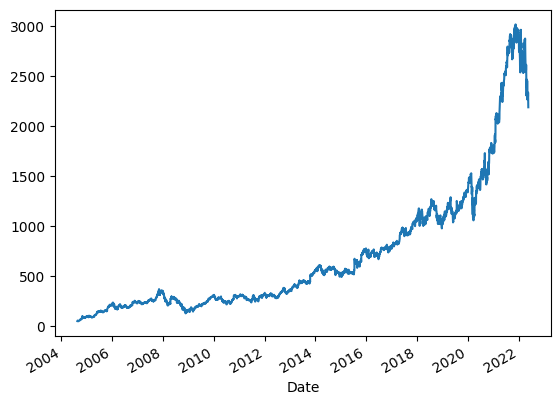

In [86]:
google_data['Close'].plot()

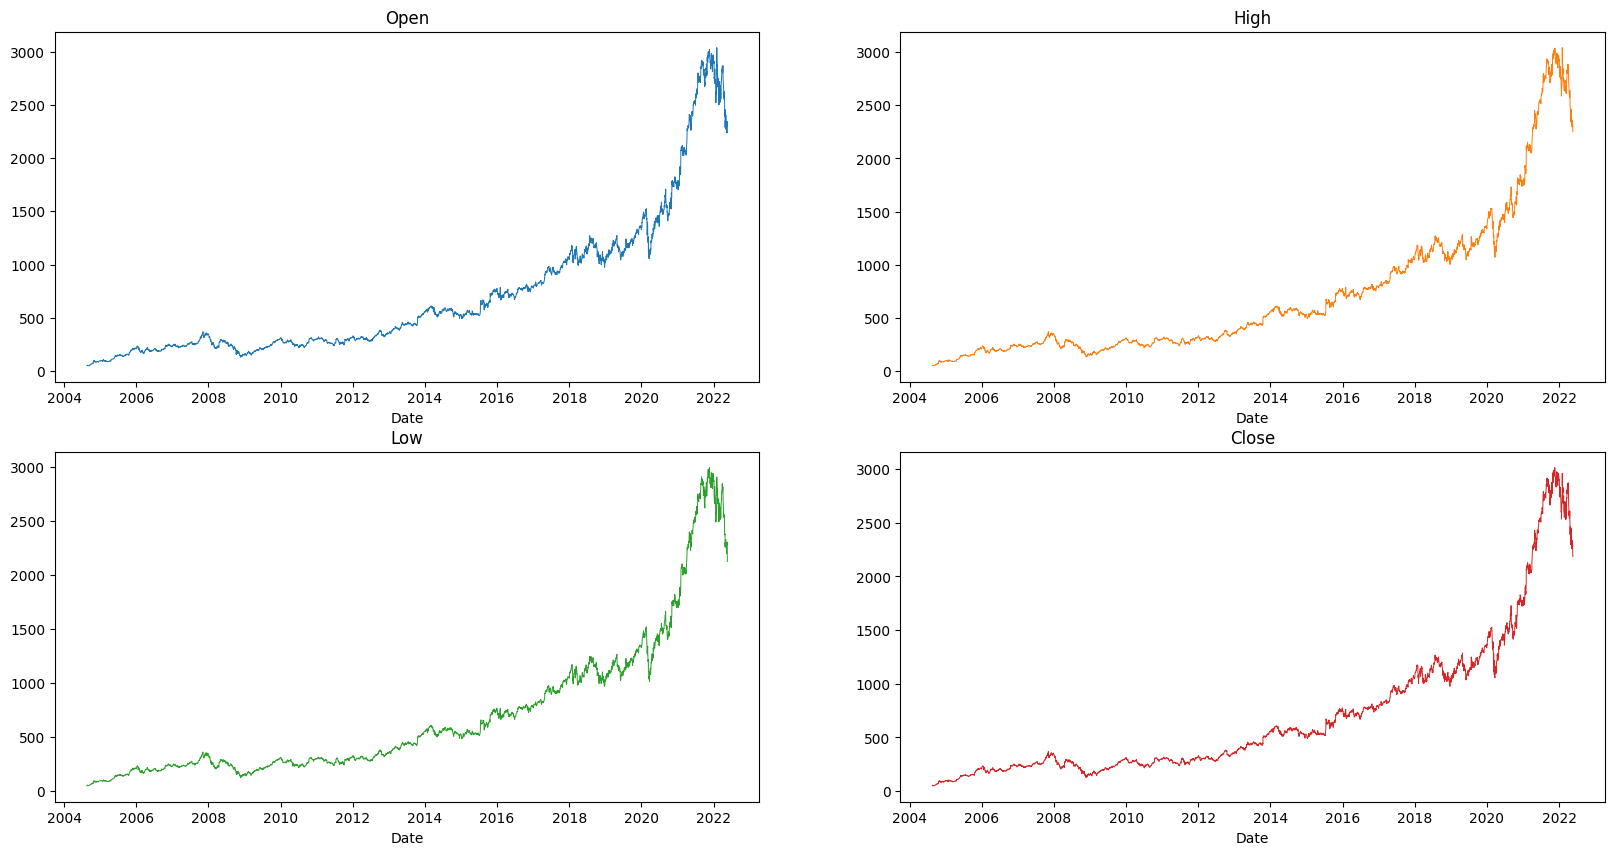

In [89]:
subset_google_data = google_data[['Open','High','Low','Close']]
ax = subset_google_data.plot(subplots=True,layout=(2,2),sharex=False,sharey=False,linewidth=0.7,fontsize=10,
                       legend=False,figsize=(20,10),
                       title=['Open','High','Low','Close'])

<Axes: xlabel='Date'>

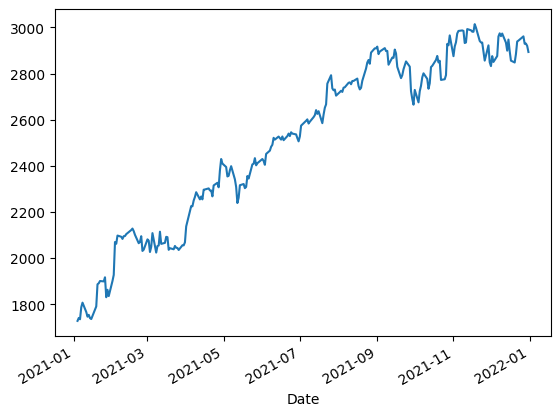

In [101]:
# Plot for particular month/year/week
google_data.loc['2021']['Close'].plot()

<Axes: xlabel='Date'>

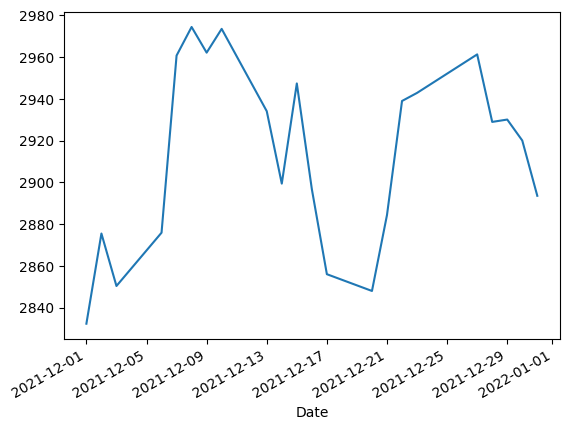

In [102]:
google_data.loc['2021-12']['Close'].plot()

In [104]:
google_data.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4471, freq=None)

In [107]:
# Here in the above code we can see that the freq is None but we can define some freq by using asfreq object.
google_data = google_data.asfreq('B')

In [108]:
google_data.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4632, freq='B')

In [111]:
google_data.asfreq('Q')
google_data.asfreq('M')
google_data.asfreq('H')

C:\Users\sasha\AppData\Local\Temp\ipykernel_17104\3854972727.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  google_data.asfreq('Q')
C:\Users\sasha\AppData\Local\Temp\ipykernel_17104\3854972727.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  google_data.asfreq('M')
C:\Users\sasha\AppData\Local\Temp\ipykernel_17104\3854972727.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  google_data.asfreq('H')


,Open,High,Low,Close,Adj Close,Volume,Month_Name,Weekday_Name,Quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-05-19 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-19 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-19 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# method is bfill and ffill which is used to fill the value forward and backward.
google_data.asfreq('H',method='ffill')

C:\Users\sasha\AppData\Local\Temp\ipykernel_17104\2710933132.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  google_data.asfreq('H',method='ffill')


,Open,High,Low,Close,Adj Close,Volume,Month_Name,Weekday_Name,Quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 01:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 02:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 03:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 04:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
...,...,...,...,...,...,...,...,...,...
2022-05-19 20:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0
2022-05-19 21:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0
2022-05-19 22:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0


C:\Users\sasha\AppData\Local\Temp\ipykernel_17104\1226718898.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  google_data['Close'].asfreq('Q').plot()


<Axes: xlabel='Date'>

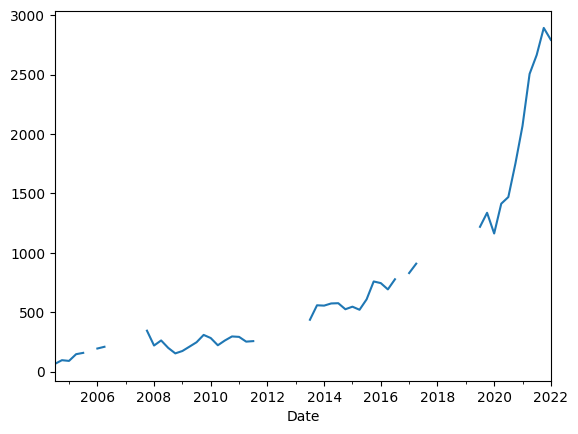

In [115]:
google_data['Close'].asfreq('Q').plot()

<Axes: xlabel='Month_Name'>

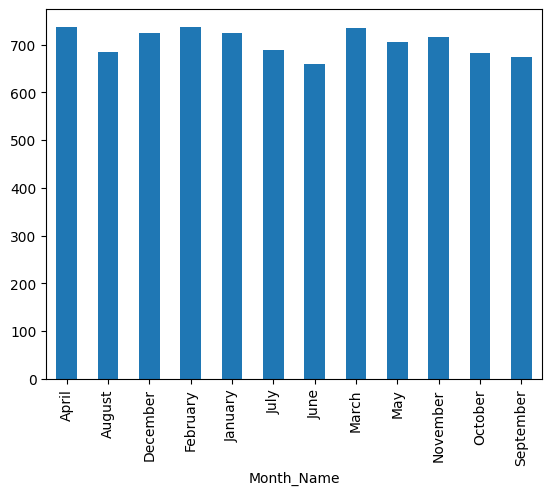

In [120]:
google_data.groupby('Month_Name')['Open'].mean().plot(kind='bar')

<Axes: xlabel='Weekday_Name'>

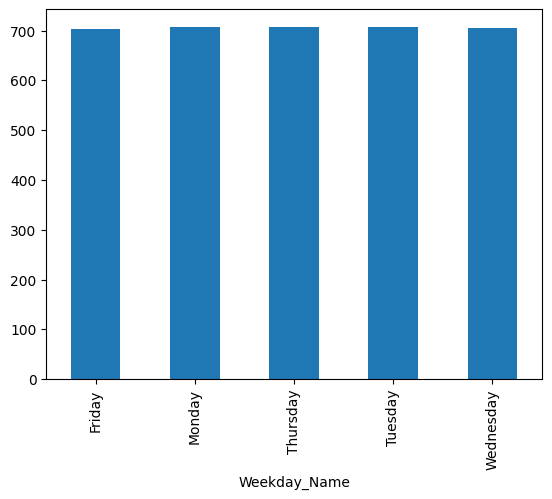

In [122]:
google_data.groupby('Weekday_Name')['Open'].mean().plot(kind='bar')

<Axes: xlabel='Quarter'>

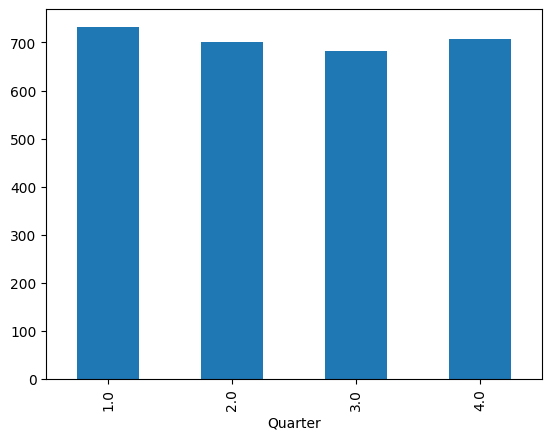

In [123]:
google_data.groupby('Quarter')['Open'].mean().plot(kind='bar') 

# Resampling 

Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

- Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds.
- Downsampling: Where you decrease the frequency of the samples, such as from days to months.

C:\Users\sasha\AppData\Local\Temp\ipykernel_17104\2587006111.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  google_data['Close'].resample('Q').mean().plot()
C:\Users\sasha\AppData\Local\Temp\ipykernel_17104\2587006111.py:2: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  google_data['Close'].resample('Q').mean().plot()


<Axes: xlabel='Date'>

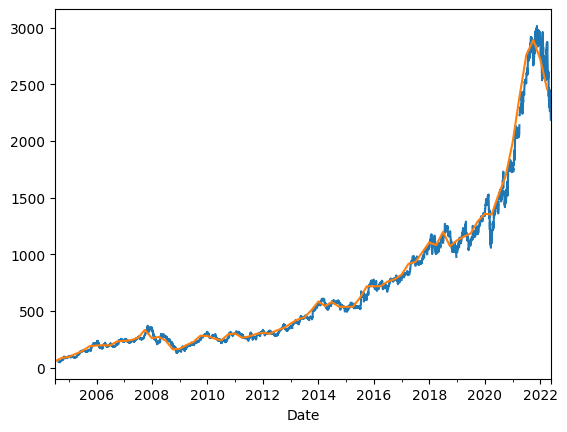

In [129]:
# Downsampling 
google_data['Close'].plot()
google_data['Close'].resample('Q').mean().plot()

C:\Users\sasha\AppData\Local\Temp\ipykernel_17104\232129613.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  google_data['Close'].resample('12H').interpolate(method='spline',order=2).plot()


<Axes: xlabel='Date'>

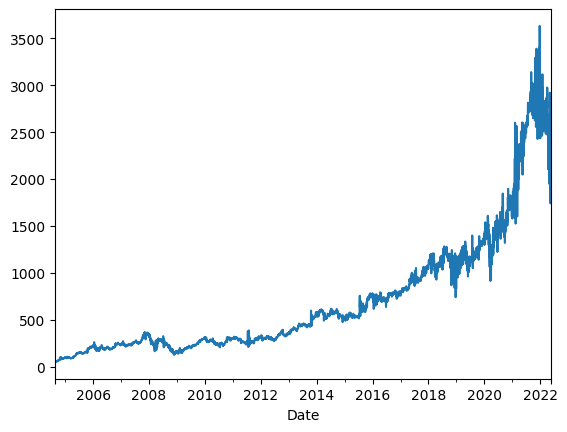

In [136]:
# Upsampling 
google_data['Close'].resample('12H').interpolate(method='spline',order=2).plot()

# Rolling Window(Smoothing)
- Rolling window and shifting is left Please watch video

Time series data in original format can be quite volatile, especially on smaller aggregation levels. 
The concept of rolling, or moving averages is a useful technique for smoothing time series data.